In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import csv

In [4]:
data = pd.read_csv("1.csv")
data

,Frequency (Hz),V0 (V),Vc (V),Phase shift (ms)
0,100,3.98,3.340,-1.000
1,200,3.92,2.420,-0.740
2,300,3.88,1.800,-0.608
3,400,3.86,1.400,-0.520
4,1000,3.84,0.610,-0.232
5,2000,3.84,0.308,-0.120
6,5000,3.88,0.124,-0.050


In [7]:
v0 = data["V0 (V)"]
vc = data["Vc (V)"]
omega = data["Frequency (Hz)"] * 2 * np.pi

v0, omega

(0    3.98
 1    3.92
 2    3.88
 3    3.86
 4    3.84
 5    3.84
 6    3.88
 Name: V0 (V), dtype: float64,
 0      628.318531
 1     1256.637061
 2     1884.955592
 3     2513.274123
 4     6283.185307
 5    12566.370614
 6    31415.926536
 Name: Frequency (Hz), dtype: float64)

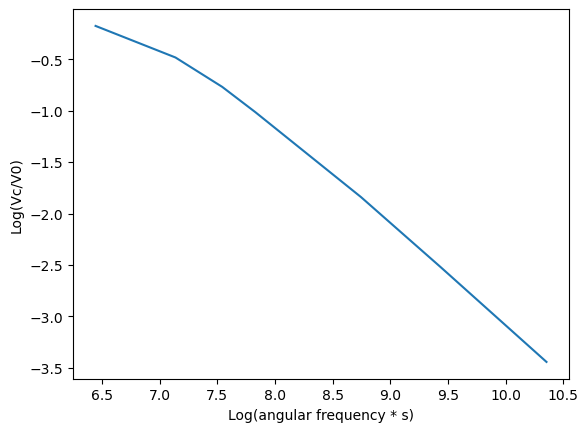

In [13]:
plt.xlabel("Log(angular frequency * s)")
plt.ylabel("Log(Vc/V0)")
plt.plot( np.log(omega), np.log(vc/v0) )

In [21]:
def model(omega, A, tau):
    return A / np.sqrt(1 + (omega*tau)**2) # vc/v0

In [22]:
fit = sp.optimize.curve_fit(model, omega, vc/v0)
fit

(array([ 0.99208451, -0.00100312]),
 array([[ 1.95170313e-05, -3.19873943e-08],
        [-3.19873943e-08,  6.33384949e-11]]))

In [31]:
[A_fit, tau_fit], cov = fit

A_fit, tau_fit

(0.9920845084561557, -0.001003118780280245)

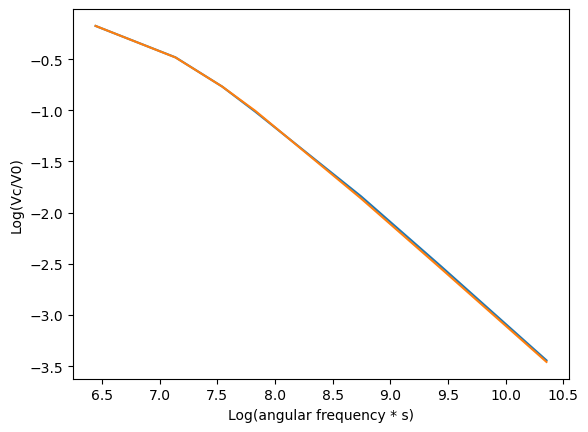

In [32]:
plt.xlabel("Log(angular frequency * s)")
plt.ylabel("Log(Vc/V0)")
plt.plot( np.log(omega), np.log(vc/v0) )
plt.plot( np.log(omega), np.log( model(omega, A_fit, tau_fit) ) )

In [37]:
[A_error, tau_error] = np.sqrt(np.diagonal(cov))
A_error, tau_error

(0.004417808426358619, 7.958548542796575e-06)

In [15]:
sp.optimize.curve_fit?

Signature:
sp.optimize.curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, and each element should be float
    convertible if it is an array like object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then th